## Loading Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import math

In [3]:
data=california_housing.data

In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
x_points=data['Latitude']
y_points=data['Longitude']

## Geographical Map
- Here we are trying to visualize the houses in California

In [20]:
!pip install basemap

In [25]:
import folium
import seaborn as sns
from folium.plugins import HeatMap 
from mpl_toolkits.basemap import Basemap

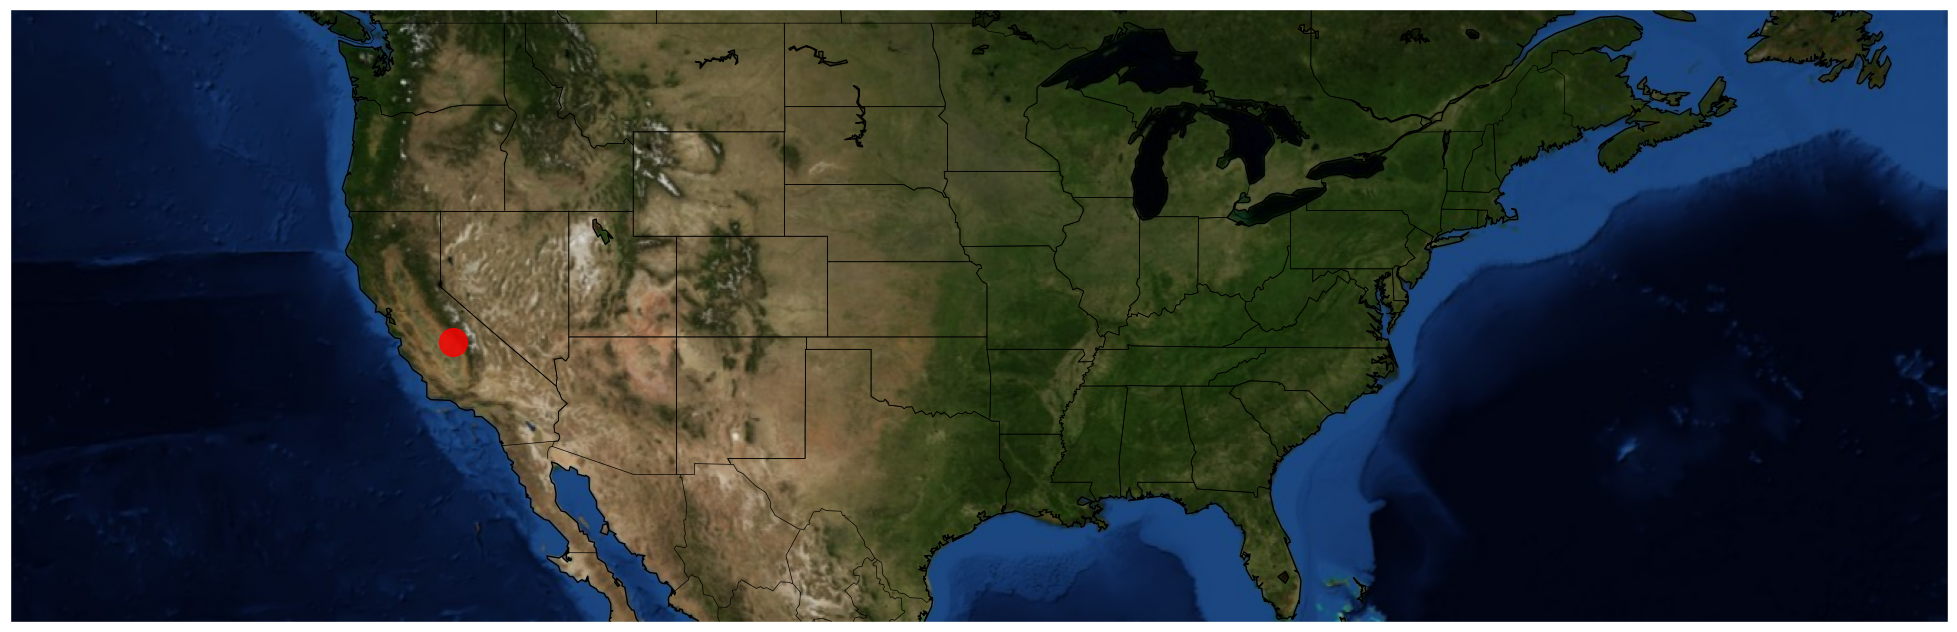

In [23]:
m = Basemap(projection='mill',llcrnrlat=25,urcrnrlat=49.5,\
            llcrnrlon=-140,urcrnrlon=-50,resolution='l')

plt.figure(figsize=(25,17))
m.drawcountries() 
m.drawstates()  
m.drawcoastlines()
x,y = m(-119.4179,36.7783)
m.plot(x, y, 'ro', markersize=20, alpha=.8) 
m.bluemarble() 
m.drawmapboundary(color = '#FFFFFF')

Text(0.5, 36.72222222222221, 'latitude')

<Figure size 1500x1000 with 0 Axes>

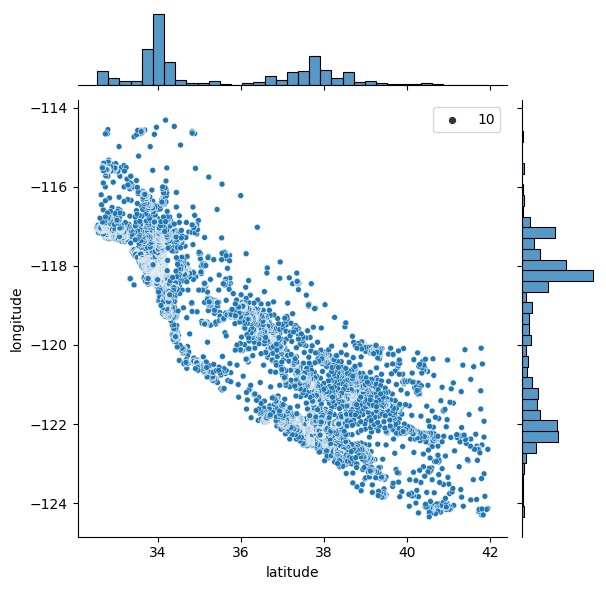

In [27]:
plt.figure(figsize=(15,10))
sns.jointplot(x=x_points,y=y_points,size=10)
plt.ylabel("longitude")
plt.xlabel("latitude")

In [30]:
map = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = data[['Latitude', 'Longitude']]
data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map)
map

## Using Brute Force Method
- Here we are trying to use Brute Force method, the idea is to try all possible combinations of latitue and Longitude from where they start in California, Taking the extreme houses from the complete distribution of Houses. i.e. in Latitude from 32-42 and Longitude from -126 to -114.

- It takes upto 8100 EPochs and will run 100%, Be patience

### Objective 1: Efficient Line

In [6]:
def calc_dist(point,line):
  I=np.array([[1,0],[0,1]])
  (a,b)=line
  a=np.array(a)
  b=np.array(b)
  point=np.array(point)
  result_matrix=np.dot((I-np.dot(a,np.transpose(a))),(point-b))
  return( (result_matrix[0]**2)+(result_matrix[1]**2))

In [7]:
x_min=int(min(x_points))
x_max=int(max(x_points))
y_min=int(min(y_points))
y_max=int(max(y_points))

In [42]:
# Here we have taken the maximum possible value of min_dist, and we iteratively change that to min value we encounter

min_dist=100000000
x1=y1=x2=y2=0

In [9]:
j=1
lines=[]
distance=[]
for a in range(x_min,x_max):
  for b in range(y_min,y_max):
    for c in range(x_min,x_max):
      for d in range(y_min,y_max):
        a=a/(math.sqrt(a**2+b**2))
        b=b/(math.sqrt(a**2+b**2))
        print(j)
        j=j+1
        line=([[a],[b]],[[c],[d]])
        lines.append(line)
        dist=0
        for i in range(0,len(x_points)):
          point=[[x_points[i]],[y_points[i]]]
          dist=dist+calc_dist(point,line)
        distance.append(dist)
        if( dist<=min_dist):
          min_dist=dist
          print('Min_Distance Updated:- ',min_dist)
          x1=a
          y1=b
          x2=c
          y2=d


1
Min_Distance Updated:-  [492769.88438005]
2
Min_Distance Updated:-  [446443.37830622]
3
Min_Distance Updated:-  [404145.53679088]
4
Min_Distance Updated:-  [364274.57799466]
5
Min_Distance Updated:-  [326821.43410216]
6
Min_Distance Updated:-  [291785.95505904]
7
Min_Distance Updated:-  [259168.14338396]
8
Min_Distance Updated:-  [228967.99973105]
9
Min_Distance Updated:-  [201185.52416121]
10
Min_Distance Updated:-  [175820.71667894]
11
12
13
14
15
16
Min_Distance Updated:-  [175596.7197988]
17
Min_Distance Updated:-  [152672.00970734]
18
Min_Distance Updated:-  [132164.9677038]
19
Min_Distance Updated:-  [114075.59378816]
20
Min_Distance Updated:-  [98403.88796043]
21
22
23
24
25
26
Min_Distance Updated:-  [98269.81637416]
27
Min_Distance Updated:-  [85038.20793726]
28
Min_Distance Updated:-  [74224.26758827]
29
Min_Distance Updated:-  [65827.99532719]
30
Min_Distance Updated:-  [59849.39115401]
31
32
33
34
35
36
Min_Distance Updated:-  [59805.24486162]
37
Min_Distance Updated:-  [

1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
Min_Distance Updated:-  [54049.96134398]
1838
Min_Distance Updated:-  [53176.255

3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443


4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4876
4877
4878
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4899
4900
4901
4902
4903
4904
4905
4906
4907
4908
4909
4910
4911
4912
4913
4914
4915
4916
4917
4918
4919
4920
4921
4922
4923
4924
4925
4926
4927
4928
4929
4930
4931
4932
4933
4934
4935
4936
4937
4938
4939
4940
4941
4942
4943
4944
4945
4946
4947
4948
4949
4950
4951
4952
4953
4954
4955
4956
4957
4958
4959
4960
4961
4962
4963
4964
4965
4966
4967
4968
4969
4970
4971
4972
4973
4974
4975
4976
4977
4978
4979
4980
4981
4982
4983
4984
4985
4986
4987
4988
4989
4990
4991
4992
4993
4994
4995
4996
4997
4998
4999
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033


6416
6417
6418
6419
6420
6421
6422
6423
6424
6425
6426
6427
6428
6429
6430
6431
6432
6433
6434
6435
6436
6437
6438
6439
6440
6441
6442
6443
6444
6445
6446
6447
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615


8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100


In [10]:
print(x1)
print(y1)
print(x2)
print(y2)

0.29240308690553535
-0.9562951609038468
37
-124


In [11]:
x1 = 0.29240308690553535
y1 = -0.9562951609038468
x2 = 37
y2 = -124

Equation of line: r = a +t(b-a)
changing to general form: y = c + mx

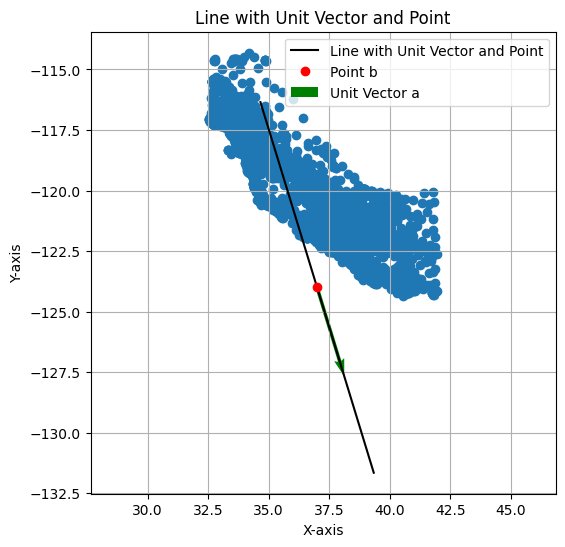

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the unit vector
a = np.array([x1, y1])  # Example unit vector

# Choose a point on the line
b = np.array([x2, y2])  # Example point on the line

# Generate points along the line
t_values = np.linspace(-8, 8, 100)  # Range of parameter values
points_on_line = b + np.outer(t_values, a)  # Generate points using the parametric equation

# Plot the line
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points)
plt.plot(points_on_line[:, 0], points_on_line[:, 1],color='black', label='Line with Unit Vector and Point')
plt.plot(b[0], b[1], 'ro', label='Point b')
plt.quiver(b[0], b[1], a[0], a[1], scale=5, color='g', label='Unit Vector a')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line with Unit Vector and Point')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Objective 2: Fair Line Using MinMax
- Here We have Used MinMax Function to find the minimum of the maximum distance to any house.
- The idea here is that we have tried to obtain the list of line that was obtained in the Objective 1, used Decision Tree, i.e. Converted the list into Binary Tree and then applied Min Max Algorithm to get the result

In [17]:
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):

    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]

    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))

    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))

house_x=37
house_y=-120

point=[[house_x],[house_y]]

x=x_min
points=[]
scores = []

a = np.array([x1,y1])
b = np.array([x2,y2])
t_values = np.linspace(-5, 5, 100)
points_on_line = b + np.outer(t_values,a)
for(x,y) in points_on_line:
  line=([[0],[0]],[[x],[y]])
  scores.append(float(calc_dist(point,line)))
  points.append([x,y])


treeDepth = int(math.log(len(scores), 2))
print("The optimal distance is : ", end = "")
result=minimax(0, 0, False, scores, treeDepth)
print(result)

x,y=points[scores.index(result)]


The optimal distance is : 2.2636523090280276


### Objective 3: Multiple Efficient Lines
- Extended from 1st Objective and Founded the Multiple Efficient Lines that may have Existed

In [18]:
indexes=[]
for i in range(len(distance)):
  if(distance[i]==min_dist):
    indexes.append(i)

line_needed=[]
for i in indexes:
  line_needed.append(line)

for ([[a],[b]],[[c],[d]]) in line_needed:
  x1=a
  y1=b
  x2=c
  y2=d




In [39]:
print("Multiple Efficient Lines: ", len(line_needed))

Multiple Efficient Lines:  1


In [40]:
print("Coordinates of new Efficient Lines: ", line_needed)

Coordinates of new Efficient Lines:  [([[0], [0]], [[38.46201543452768], [-128.78147580451923]])]


### Next Three Approaches have been Discussed in next ipynb File